In [ ]:
# Deep Learning - Advanced Neural Networks with many hidden layers and hundreds of neuron per layer.

# Deep Learning requires Graphical Processing Unit(GPUs) for faster processing and computation.

# Free GPU's are available at Google Colab(Python only) and kaggle(Both Python and R).

# Google Colab has both GPUs and TPUs(Tensor Processing Units).

# Tensor is a mathemetical object represented as arrays of multi dimension. Every Tensor has a Rank which is the dimension of array or vector that
# makes up the tensor.

# Libraries for Deep Learning - Tensorflow & Keras, PyTorch.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Image data
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


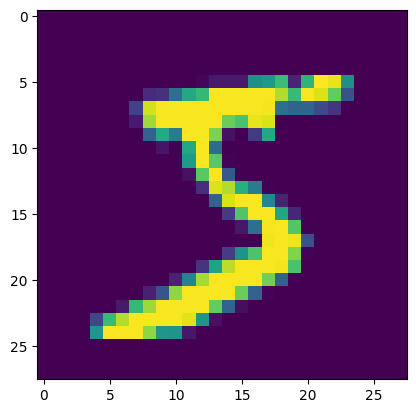

In [ ]:
# Show the image

plt.imshow(X_train[0]) # Handwritten digits images from 0 to 9.

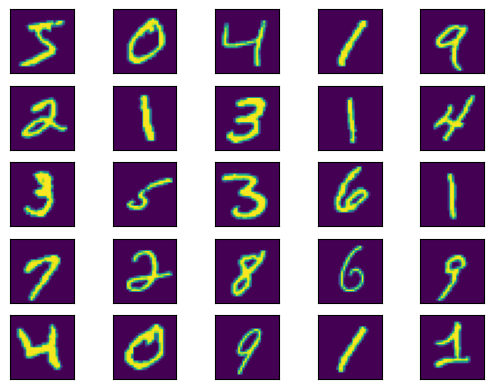

In [ ]:
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
plt.show()

In [ ]:
# Step1: Preprocessing of Images - Reshape or convert images to pixels and pixels(numeric format of image) and pixels range from 0 to 255.

In [ ]:
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

# -1 represent 1D or One Dimention
# 28 x 28 = 784

In [ ]:
X_train[0] # this output is only for one image.

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
# Step 2: Preprocessing of images - Normalization or Min Max Scaler must be done to bring all values in range of 0 and 1 and positive only.

# MinMax Scaler = (X-Xmin)/(Xmax-Xmin)
# Normalization must be done for faster computation process.

X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# Neural Network Model - Functions must be used for defining Neural Network.

# Sequential() - Model defination function. Neural Networks are sequential Linear Models.

# Dense() - to define a hidden layer. parameters to be given are number of neurons in the layer(integer), activation function to be used.
# Activation functions are linear, sigmoid, tanh, relu, softmax.

# Dropout() -  How many neurons to be dropped
# BatchNormalization() - Normalize data in batches.
# Final layer Dense() depends on the model being built. Activation function and no.of neurons depend on model being built.

# Regression Model - Activation Function is Linear (number of neurons - 1)
# Binary Classification Model - Activation Function is sigmoid(number of neurons -2).
# Multinomial classification - Activation Function is softmax(number of neurons depend on number of levels in depedent variable).

# Compile Model Metrics
# Define the optimizer to be used - adam(default), sgd, RMSprop
# Define Loss Function - Binary cross Entorpy (Binary Data), Categorical Cross Entropy(Multimnomail Data)

# Define Metrics - Classification (Accuracy & F1 Score) & Regression(RMSE & R Square.)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
nn = Sequential()
nn.add(Dense(1024,activation="relu",input_shape=(784,))) # First hidden layer
nn.add(Dense(128,activation="relu"))
nn.add(Dense(10,activation="softmax"))

nn.compile(optimizer = "adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 936,330
Trainable params: 936,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Label Encode Dependent Variable
y_train = tensorflow.keras.utils.to_categorical(y_train,10)
y_test = tensorflow.keras.utils.to_categorical(y_test,10)

In [ ]:
# Fitting the Model
nn.fit(X_train,y_train,epochs=10,batch_size = 128, validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 11s 5ms/step - loss: 0.2144 - accuracy: 0.9368 - val_loss: 0.1157 - val_accuracy: 0.9641
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0763 - accuracy: 0.9761 - val_loss: 0.0728 - val_accuracy: 0.9775
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0644 - val_accuracy: 0.9797
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0596 - val_accuracy: 0.9809
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0645 - val_accuracy: 0.9822
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0738 - val_accuracy: 0.9806
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0191 - accuracy: 0.9932 - val_loss: 0.0801 - val_accuracy: 0.9787
Epoch

### Prediction

In [ ]:
testdata = X_train[128:200]

In [ ]:
pred = nn.predict(testdata)

3/3 [==============================] - 0s 4ms/step


In [ ]:
predicted_digits = np.argmax(pred,axis = 1)
print(predicted_digits)

[1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4
 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2]
